### Milestone 2 Task 4 (Group 55)
YuenLok, Chung

Student ID: 48205959

For this project, my research question is trying to obtain what are some possible factors that affect the NO2 concentration, as NO2 is one of the major air pollutant that impacts air quality heavily. Before answering this question, some cleaning and restructure process need to be done for the dataset in order to have a clear visualisation. To do this, the following codes are executed:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
def load_and_process(url_or_path_to_csv_file):
    ## rename columns and dropping NaN columns and rows
    DF1= (pd.read_csv(url_or_path_to_csv_file,sep=';',decimal=',')
        .rename(columns={'CO(GT)':'CO C(mg/m^3)','NMHC(GT)':'NMHC C(mg/m^3)',
               'C6H6(GT)':'C6H6 C(mg/m^3)','NOx(GT)':'NOx C(ppb)','NO2(GT)':'NO2 C(mg/m^3)'})
        .dropna(how='all')
        .dropna(how='all',axis='columns'))
    ##Dropping other columns, convert to datetime object and adding new columns
    DF2=(DF1.drop(columns=['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)',
                          'C6H6 C(mg/m^3)','NOx C(ppb)','NMHC C(mg/m^3)','CO C(mg/m^3)'])
        .assign(Date=lambda df_:pd.to_datetime(df_['Date']),
          month=lambda df_:pd.DatetimeIndex(df_['Date']).month)
        .drop(DF1.index[(DF1['NO2 C(mg/m^3)']==-200.0)].tolist(),axis=0))
    return DF2

Codes illustrated above just renaming some columns, dropping some columns and rows that contains lots of missing values, dropping other columns that are not related to the NO2 concentration and adding a "Month" column which shows the month of the concentration recored. Finally, I drop the row that has a NO2 concentration of -200 mg/m^3, which is unreasinable. Below are what the dataframe looks like after the processes:

In [9]:
df4=load_and_process("C:/Users/UX305/data301/data301Project/project-group55-project/data/raw/AirQualityUCI/AirQualityUCI.csv")
df4

,Date,Time,NO2 C(mg/m^3),T,RH,AH,month
0,2004-10-03,18.00.00,113.0,13.6,48.9,0.7578,10
1,2004-10-03,19.00.00,92.0,13.3,47.7,0.7255,10
2,2004-10-03,20.00.00,114.0,11.9,54.0,0.7502,10
3,2004-10-03,21.00.00,122.0,11.0,60.0,0.7867,10
4,2004-10-03,22.00.00,116.0,11.2,59.6,0.7888,10
...,...,...,...,...,...,...,...
9352,2005-04-04,10.00.00,190.0,21.9,29.3,0.7568,4
9353,2005-04-04,11.00.00,179.0,24.3,23.7,0.7119,4
9354,2005-04-04,12.00.00,175.0,26.9,18.3,0.6406,4
9355,2005-04-04,13.00.00,156.0,28.3,13.5,0.5139,4


Nitrogen dioxide can cause air hazy and hard to see through,so the higher NO2 concentration, the lower visibility. However, NO2 is not a greenhouse gases. In other word, NO2 concentration may not increase as the temperature rises. In order to justify this statement, a barplot is created. 

<AxesSubplot:xlabel='int T', ylabel='NO2 C(mg/m^3)'>

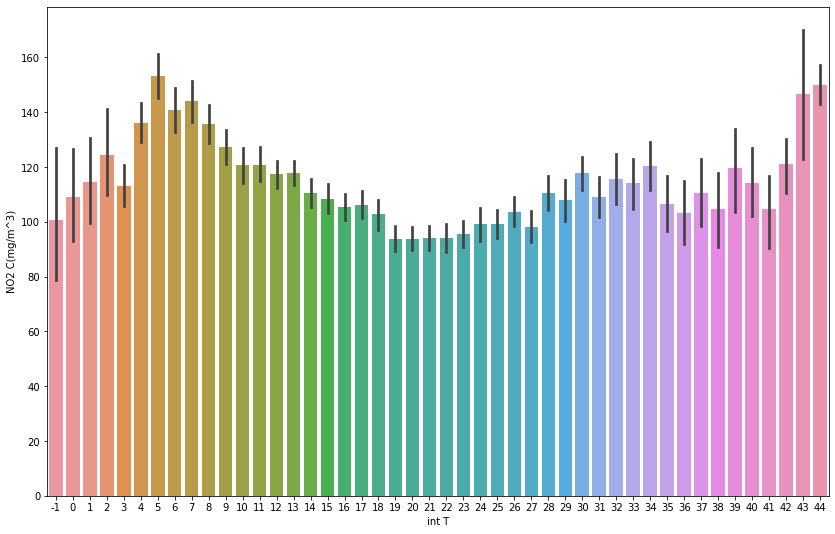

In [12]:
def catagorize(x):
    return int(x['T'])
df4.apply(catagorize,axis='columns')
df4['int T']=df4.apply(catagorize,axis='columns')
ind=df4.index[(df4['T']==-200.0)].tolist()
df4=df4.drop(ind,axis=0)
plt.figure(figsize=(14,9))
sns.barplot(x='int T',y='NO2 C(mg/m^3)',data=df4)

To make the barplot looks neat, I define a method called "catagorize()" to convert all these temperature into integer type. These integer data are stored in a new column called "int T" in the dataframe. The barplot illustares the average NO2 concentration under various temperature.In this case, x axis is the temperature and y axis is the NO2 concentration in the air. From the barplot, although the NO2 concentrations from 15°C to 25°C are generally lower than other temperatures (this might be not applicable to to other cases), it is obvious that there is no such a trend that NO2 concentration is increasing as temperature increses. A correlation heatmap is another direct way to prove this.

<AxesSubplot:>

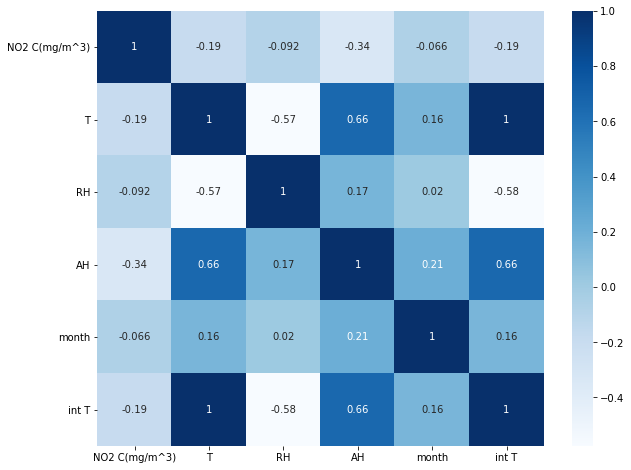

In [13]:
plt.figure(figsize=(10,8))
Air_mx = df4.corr()
sns.heatmap(Air_mx, annot=True, cmap='Blues')

In the correlation heatmap, the number in each square indicates the correlation between two variables, the number that is closer to 1, the higher possibility that these two variables forming a linear relationship. There are also some number are negative in this map, which means that as one of these variable getting larger, the other will become smaller.If the number is positive, then the variable will move into the same direction as another does. From here, it is easily discover that the correlation coefficient between temperature and NO2 concentration is only -0.19, which means the temperature is highly uncorrelated to the NO2 concentration. In addition, the correlation coefficient between NO2 concentration and Relative humidity(RH) is only -0.092 and the coefficient between NO2 concentration and Absolute humidity(AH) is only -0.34. In this case, there are no linear relstionship among these variables. However, some variables such as time and month, needed to be analyzed through other types of heatmaps.

<AxesSubplot:xlabel='Time', ylabel='month'>

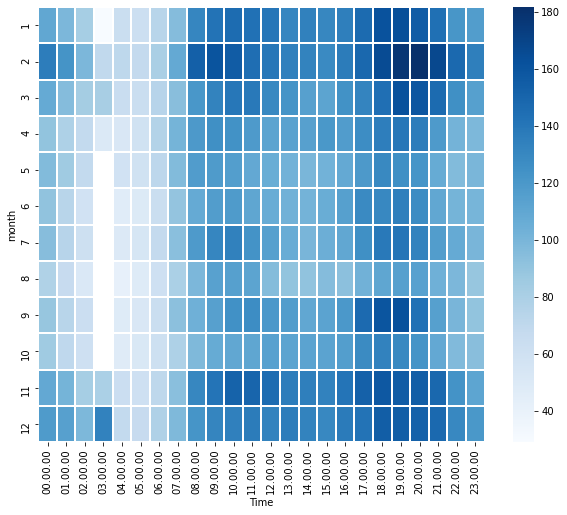

In [15]:
plt.figure(figsize=(10,8))
Nitrogen = df4.pivot_table(index='month', columns='Time', values='NO2 C(mg/m^3)')
sns.heatmap(Nitrogen, cmap='Blues', linecolor='white',linewidth=1)

In this heatmap, y-axis represents the Time and x-axis represents the Month that data are recorded, the brightness of each small rectangle indicates average NO2 concentration under various time in a specific month. From this heatmap, one notable point is that the average NO2 concentration in the period between 1am and 6am in all months are much lower than other time as those rectangles are much brighter (Note:Some data seems missing at 3 am for several months). One possible reason for that may be that huaman activities are largely reduced during this period as burning fossil fuel is one of the primary source of NO2, but this may need more evidences to prove it. Additionally, the concentration of NO2 from November to Feburary seems higher than in other months.

In conclusion, after doing some analysis of tha dataset, the listed environment factors in the dataset (Temperature, Relative Humidity and Abosolute humidity) do not affect the NO2 concentrtion as the correlation heatmap and the barplot illustarstes that there is are no correlation among these variables. Nevertheless, there is an observation that a drop in NO2 concentration occurs in the early omring all the time and the concentration in November to Feburary seems higher compared to other months. The reason of occurrence of this phenomenon needed to be further explored.